In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Supervised Learning: Classification

## Reading and investigating the data

In [4]:
data = pd.read_csv('bankdata.csv')

In [5]:
data.shape

(74364, 9)

In [6]:
data.dtypes

type             object
operation        object
amount_total    float64
balance         float64
k_symbol         object
amount_left       int64
duration          int64
payments        float64
status           object
dtype: object

In [7]:
data.head()

,type,operation,amount_total,balance,k_symbol,amount_left,duration,payments,status
0,PRIJEM,prevod,44749.0,45549.0,unknown,79608,24,3317.0,A
1,PRIJEM,vklad,1000.0,1000.0,unknown,52788,12,4399.0,A
2,PRIJEM,vklad,1100.0,1100.0,unknown,21924,36,609.0,A
3,PRIJEM,vklad,700.0,700.0,unknown,23052,12,1921.0,A
4,PRIJEM,vklad,900.0,900.0,unknown,41904,12,3492.0,A


In [8]:
data['status'].value_counts()

A    64599
B     9765
Name: status, dtype: int64

### Investigating the numerical variables

In [9]:
data.describe()

,amount_total,balance,amount_left,duration,payments
count,74364.000000,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,23.942230,4356.580832
std,11729.040391,25439.948570,74749.275498,12.155783,2205.840892
min,0.000000,-14137.200000,4980.000000,12.000000,319.000000
25%,144.300000,27675.125000,46320.000000,12.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,24.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,36.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,60.000000,9736.000000


#### Investigating variable duration

In [10]:
data['duration'].value_counts()

12    28761
24    25155
36    14110
48     4721
60     1617
Name: duration, dtype: int64

In [11]:
# we will convert this to a categorical
data['duration'] = data['duration'].apply(str)

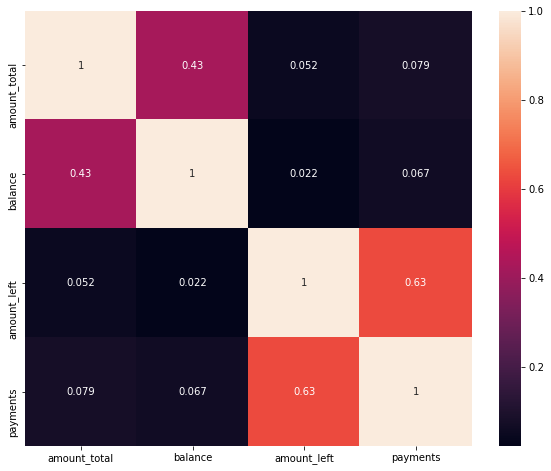

In [12]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

payments and amount_left have a rather high correlation, so we will include only one of them in the model

C:\Users\vicke\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


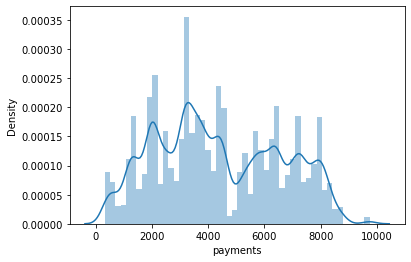

In [13]:
#sns.distplot(data['amount_total'])
#plt.show()

#sns.distplot(data['balance'])
#plt.show()

sns.distplot(data['payments'])
plt.show()

### Preprocessing the numerical variables

In [14]:
from sklearn.preprocessing import StandardScaler
data_num = bank.select_dtypes(include = np.number).drop(columns = 'y')
print(data_num.head())
# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)
print(x.head())

NameError: name 'bank' is not defined

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


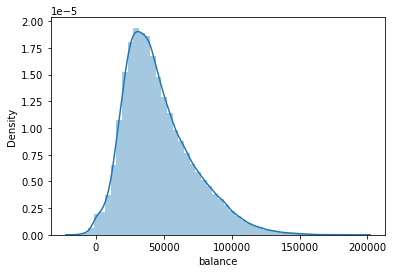

In [72]:
sns.distplot(data['balance'])
plt.show()

C:\Users\vicke\anaconda3\envs\kittycat\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


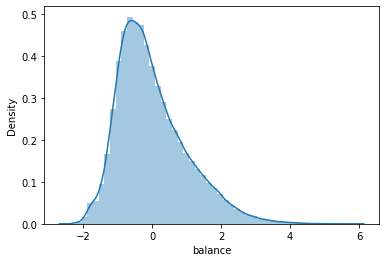

In [73]:
sns.distplot(x['balance'])
plt.show()

### Getting dummies for the categorical variables

In [74]:
from sklearn.preprocessing import OneHotEncoder
cat = data.select_dtypes(include = np.object).drop(columns = 'status')
enc = OneHotEncoder(drop = 'first')
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_VYBER,x0_VYDAJ,x1_unknown,x1_vklad,x1_vyber,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_24,x3_36,x3_48,x3_60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
categorical.sum(axis = 1)

0        2.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
74359    3.0
74360    3.0
74361    3.0
74362    3.0
74363    3.0
Length: 74364, dtype: float64

In [76]:
y = data['status']
X = pd.concat((x, categorical), axis=1)
X.head()

,amount_total,balance,payments,x0_VYBER,x0_VYDAJ,x1_unknown,x1_vklad,x1_vyber,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_24,x3_36,x3_48,x3_60
0,3.147453,-0.018599,-0.471289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.582545,-1.769754,0.019231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.574019,-1.765823,-1.698947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.608123,-1.781547,-1.104158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.591071,-1.773685,-0.391953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting into train and test set

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [79]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806898406508438

In [80]:
y_test.value_counts()

A    25839
B     3907
Name: status, dtype: int64

In [81]:
pd.Series(predictions).value_counts()

A    29120
B      626
dtype: int64

What happened in terms of the classes?

### Decision Tree

In [2]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

In [ ]:
pd.Series(predictions).value_counts()

In [ ]:
decisiontree.feature_importances_

In [ ]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

In [ ]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

### SVM

In [ ]:
from sklearn.svm import SVC

#svm = SVC().fit(X_train, y_train)
#predictions = svm.predict(X_test)
#print(svm.score(X_test, y_test))
#print(pd.Series(predictions).value_counts())

### K-Nearest Neighbors

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
#predictions = nearest_neighbors.predict(X_test)
#print(nearest_neighbors.score(X_test, y_test))
#print(pd.Series(predictions).value_counts())

In [4]:
#help(KNeighborsClassifier)

## Supervised Learning: Regression

In [5]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

## Model Evaluation

### Creating the Confusion Matrix

In [6]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression().fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

In [ ]:
pd.Series(predictions).value_counts()

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Precision, Recall and the F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

In [ ]:
# balanced accuracy score: average of recall for the two classes
print(recall_score(y_test, predictions, pos_label='A'))
print(recall_score(y_test, predictions, pos_label='B'))

In [ ]:
#help(balanced_accuracy_score)

#### ROC and AUC analysis

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#help(roc_curve)

In [ ]:
# we need to calculate class probabilities!
y_pred_proba = logisticr.predict_proba(X_test)[:,1]
y_pred_proba
fpr, tpr, kittycat = roc_curve(y_test, y_pred_proba, pos_label='B') 
plt.plot(fpr,tpr)

In [ ]:
logisticr.predict(X_test)

In [ ]:
logisticr.predict_proba(X_test)#[:,1]

In [ ]:
#help(logisticr.predict_proba)

In [ ]:
#help(roc_auc_score)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

### Repeating all the steps for a Decision Tree for comparison:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

In [ ]:
balanced_accuracy_score(y_test, predictions)

In [ ]:
y_pred_proba = decisiontree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
# we need to assign which one is the "positive" (1) category
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(y_test, y_pred_proba)

### Hyperparameter Tuning

Can we do even better?

In [ ]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

In [ ]:
help(DecisionTreeClassifier)

In [ ]:
param_grid_rf = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid_rf,
                       cv=3)

tune.fit(X_train, y_train)

In [ ]:
tune.best_params_

In [ ]:
decisiontree_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_train)

In [ ]:
predictions = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

In [ ]:
balanced_accuracy_score(y_test, predictions)

#### We can even extend this to multiple algorithms!

In [ ]:
# the models that you want to compare
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression()
}

# the optimisation parameters for each of the models that you have picked above (check their help functions!!)
params = {
    'DecisionTreeClassifier':
        {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [3, 10, None]
        },
    'LogisticRegression': {
        'solver': ['newton-cg', 'sag', 'lbfgs'],
        'multi_class': ['ovr', 'multinomial']
        }  
}

In [ ]:
# double checking the best prediction estimators and parameters
for model in models.keys():
    tune = GridSearchCV(estimator=models[model], param_grid=params[model], cv=3)
    tune.fit(X_train, y_train)
    print("Best estimator is {}".format(tune.best_estimator_))
    print("Best parameters are: {}".format(tune.best_params_))
    print("Best score is: {}".format(tune.best_score_)) # Standard model score, that is the accuracy score

### Cross Validation

Is our split into training and test set biased?

In [ ]:
from sklearn.model_selection import cross_validate
help(cross_validate)

In [ ]:
# cross validation picks random data for the train and test it, it can repeat this several times and then pick the average performance of the best prediction
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy") # balance score the the average accuracy of the performance and it considers both the majority and minority of the prediction while .score considers only the majority of your prediction

In [ ]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")["test_score"].mean() # average performance is 98%

## Pretending this was a multiclass problem

In [ ]:
y_train[:5000] = 'C'
y_test[:5000] = 'C'

In [ ]:
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

In [ ]:
help(precision_score)

In [ ]:
print(precision_score(y_test, predictions, average = 'macro')) # using macro gives the average of the prediction
print(recall_score(y_test, predictions, average = 'macro'))
print(f1_score(y_test, predictions, average = 'macro'))

In [ ]:
print(precision_score(y_test, predictions, average = None)) # using None gives the prediction score of each of the classes
print(recall_score(y_test, predictions, average = None))
print(f1_score(y_test, predictions, average = None))

In [ ]:
balanced_accuracy_score(y_test, predictions)